<a href="https://colab.research.google.com/github/matheustoneti/datavisualization/blob/main/Data_TED_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl
from sklearn.cluster import KMeans
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
dados = pd.read_csv('20221013_ted_talks.csv')

In [3]:
dados.head(10)

,talk_id,title,speaker,recorded_date,published_date,event,duration,views,likes
0,1,Averting the climate crisis,Al Gore,2006-02-25,2006-06-27,TED2006,957,3681537,110000
1,7,Simplicity sells,David Pogue,2006-02-24,2006-06-27,TED2006,1266,2012797,60000
2,53,Greening the ghetto,Majora Carter,2006-02-26,2006-06-27,TED2006,1096,3006315,90000
3,92,The best stats you've ever seen,Hans Rosling,2006-02-22,2006-06-27,TED2006,1176,15432904,462000
4,66,Do schools kill creativity?,Sir Ken Robinson,2006-02-25,2006-06-27,TED2006,1151,73935964,2200000
5,86,Letting go of God,Julia Sweeney,2006-02-24,2006-07-10,TED2006,978,4836214,145000
6,49,Behind the design of Seattle's library,Joshua Prince-Ramus,2006-02-23,2006-07-10,TED2006,1184,1261975,37000
7,71,A life of purpose,Rick Warren,2006-02-25,2006-07-18,TED2006,1248,4300620,129000
8,94,Let's teach religion -- all religion -- in sch...,Dan Dennett,2006-02-02,2006-07-18,TED2006,1471,4227594,126000
9,54,My wish: A call for open-source architecture,Cameron Sinclair,2006-02-26,2006-07-25,TED2006,1394,1372030,41000


In [11]:
dados['published_date'] = pd.to_datetime(dados['published_date']).dt.year

In [12]:
dados['recorded_date'] = pd.to_datetime(dados['recorded_date']).dt.year

In [21]:
dados['published_date'].value_counts()

2019    825
2018    719
2020    662
2021    459
2017    377
2022    319
2012    306
2011    260
2010    254
2013    243
2016    239
2014    238
2009    222
2015    221
2008    186
2007    122
2006     49
Name: published_date, dtype: int64

In [13]:
dados.head(10)

,talk_id,title,speaker,recorded_date,published_date,event,duration,views,likes
0,1,Averting the climate crisis,Al Gore,2006.0,2006,TED2006,957,3681537,110000
1,7,Simplicity sells,David Pogue,2006.0,2006,TED2006,1266,2012797,60000
2,53,Greening the ghetto,Majora Carter,2006.0,2006,TED2006,1096,3006315,90000
3,92,The best stats you've ever seen,Hans Rosling,2006.0,2006,TED2006,1176,15432904,462000
4,66,Do schools kill creativity?,Sir Ken Robinson,2006.0,2006,TED2006,1151,73935964,2200000
5,86,Letting go of God,Julia Sweeney,2006.0,2006,TED2006,978,4836214,145000
6,49,Behind the design of Seattle's library,Joshua Prince-Ramus,2006.0,2006,TED2006,1184,1261975,37000
7,71,A life of purpose,Rick Warren,2006.0,2006,TED2006,1248,4300620,129000
8,94,Let's teach religion -- all religion -- in sch...,Dan Dennett,2006.0,2006,TED2006,1471,4227594,126000
9,54,My wish: A call for open-source architecture,Cameron Sinclair,2006.0,2006,TED2006,1394,1372030,41000


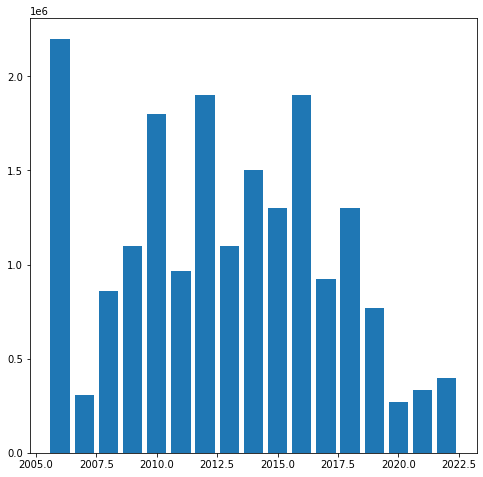

In [14]:
ax, fig = plt.subplots(figsize = (8,8))
ax = plt.bar(dados['published_date'], dados['likes'])

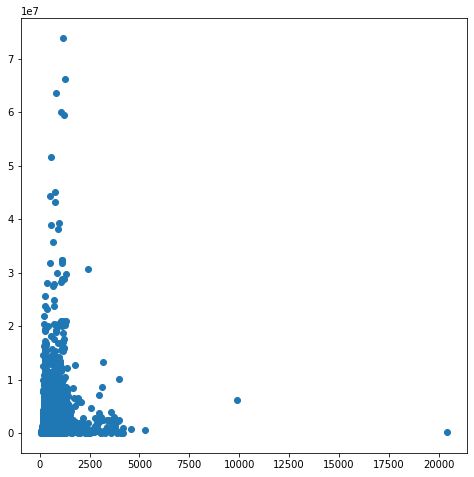

In [15]:
ax, fig = plt.subplots(figsize = (8,8))
ax = plt.scatter(dados['duration'], dados['views'])

In [19]:
dados_pair_plot = dados[['duration', 'likes', 'views', 'published_date']]

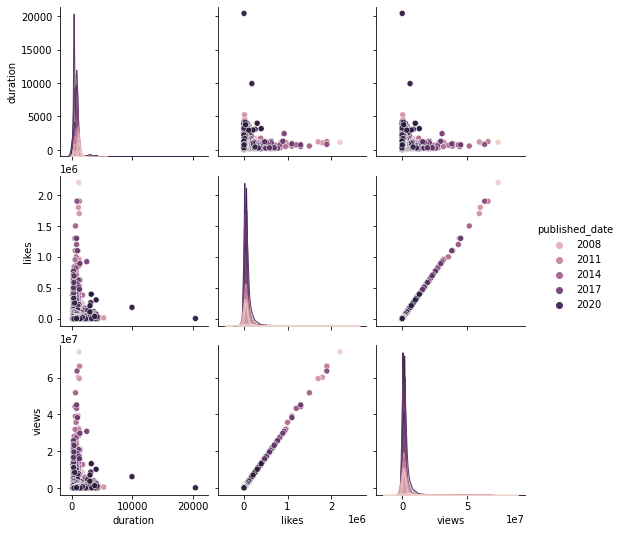

In [20]:
sns.pairplot(dados_pair_plot, hue='published_date')

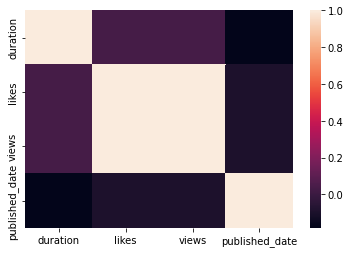

In [22]:
sns.heatmap(dados_pair_plot.corr())

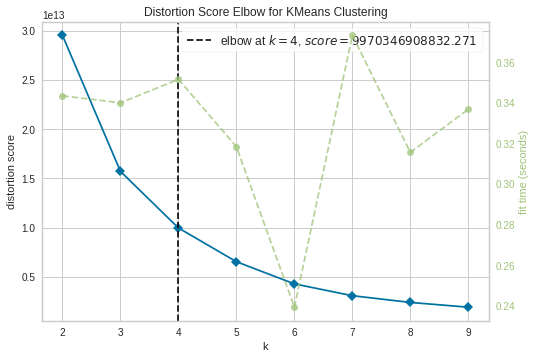

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd0b0cc150>,
                 estimator=KMeans(n_clusters=9, random_state=5), k=(2, 10))

In [26]:
kelbow_visualizer(KMeans(random_state=5), dados[['duration', 'likes']], k=(2,10))

In [33]:
kmeans = cluster.KMeans(4)

In [34]:
clusters = kmeans.fit_predict(dados[['duration', 'likes']])

In [35]:
pd.value_counts(clusters)

0    5042
2     553
1      94
3      12
dtype: int64

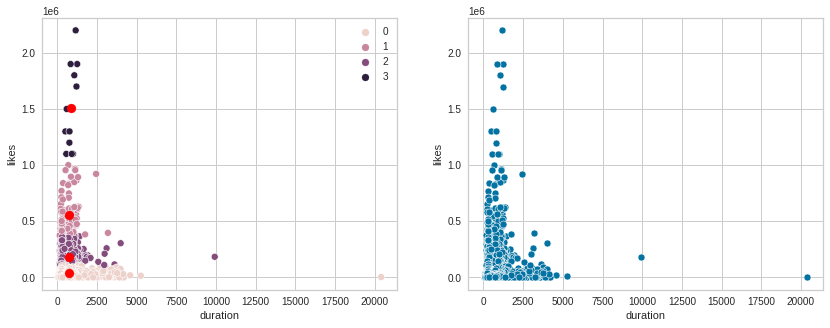

In [36]:
x_center, y_center = kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1]
fig, (axe1,axe2) = plt.subplots(1,2, figsize=(14,5))
sns.scatterplot (data =dados, x='duration', y='likes', hue= clusters, ax=axe1)
axe1.scatter(x=x_center, y=y_center, s=80, color='red')
sns.scatterplot( data=dados, x='duration', y= 'likes',  ax=axe2)

In [38]:
titulo_palestra = dados['title']

In [39]:
titulo_palestra.head(10)

0                          Averting the climate crisis
1                                     Simplicity sells
2                                  Greening the ghetto
3                      The best stats you've ever seen
4                          Do schools kill creativity?
5                                    Letting go of God
6               Behind the design of Seattle's library
7                                    A life of purpose
8    Let's teach religion -- all religion -- in sch...
9         My wish: A call for open-source architecture
Name: title, dtype: object

In [40]:
all_names = " ".join(s for s in titulo_palestra)

In [41]:
all_names

'Averting the climate crisis Simplicity sells Greening the ghetto The best stats you\'ve ever seen Do schools kill creativity? Letting go of God Behind the design of Seattle\'s library A life of purpose Let\'s teach religion -- all religion -- in schools My wish: A call for open-source architecture My wish: A global day of film My wish: Help me stop pandemics One Laptop per Child The radical promise of the multi-touch interface Improvising on piano, aged 14 An 11-year-old\'s magical violin Organic design, inspired by nature Simple designs to save a life The birth of Wikipedia The birth of the open-source learning revolution Meet the founder of the blog revolution Nerdcore comedy Why we love, why we cheat Happiness in body and soul Why the universe seems so strange Chemical scum that dream of distant quasars Choice, happiness and spaghetti sauce The freakonomics of crack dealing The surprising science of happiness The paradox of choice Meet the future of cancer research A roadmap to end

In [42]:
stopwords = set(STOPWORDS)

In [43]:
wordcloud = WordCloud (stopwords = stopwords, background_color = 'black', width = 1600, height = 800).generate(all_names) 

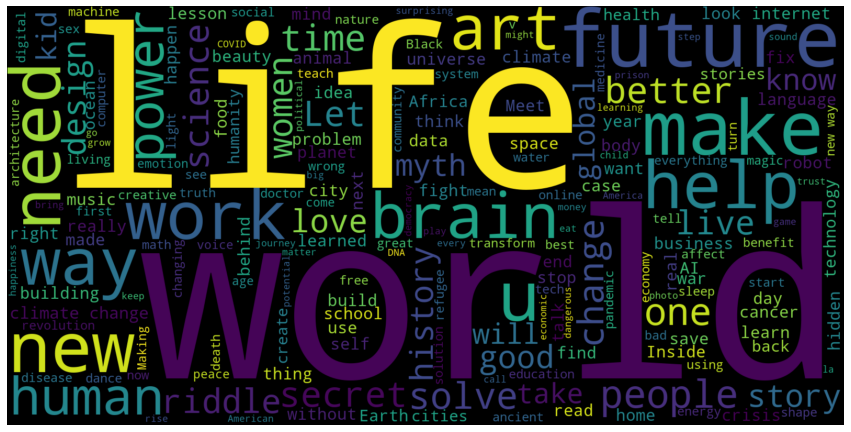

In [44]:
fig, ax = plt.subplots (figsize = (15,9))
ax.imshow(wordcloud, interpolation = 'bilinear')
ax.set_axis_off()